# Brownian Motion Ensembles

Ensemble simulations of brownian motion, browninan motion with drift and geometric brownian motion are given.</br>
Let $B_t$ denote brownian motion and let $dB_t$ denote its inifinitesimal, with </br>

$
\begin{align}
&dB_t \sim N(0,dt) \\
&\text{E}[dB_t ] = 0 \\
&\text{E} [ ( dB_t )^2 ] = dt
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}(B_t) = 0 \\
&\text{Var}(B_t) = t
\end{align}
$

Brownian motion with drift is defined by the stochastic differential equation,</br>

$
\begin{align}
dD_t = \mu dt + \sigma dB_t
\end{align}
$

directly inegrating leads to the solution,</br>

$
\begin{align}
D_t = D_0 + \mu t + \sigma B_t
\end{align}
$

The first and second moments are,

$
\begin{align}
&\text{E}[D_t] = D_0 + \mu t\\
&\text{Var}[D_t] = \sigma^2 t
\end{align}
$

Geometric brownian motion is defined by stochastic differential equation, </br>

$
\begin{align}
dS_t = \mu S_t dt + \sigma S_t dB_t
\end{align}
$

Consider $\ln{S_t}$, applying Ito's lemma,</br>

$
\begin{align}
d(\ln{S_t}) = \frac{dS_t}{S_t} - \frac{1}{2}\frac{(dS_t)^2}{S_t^2}
\end{align}
$

From the stochastic differential equation $(dS_t)^2 = \sigma^2 dt$ so, 

$
\begin{align}
d(\ln{S_t}) = \left( \mu - \frac{1}{2}\sigma^2 \right) dt + \sigma dB_t
\end{align}
$

This equation can be integrated to give the solution,</br>

$
\begin{align}
S_t=S_0 e^{\left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma B_t}
\end{align}
$

The first and second moments of geometric brownian motion are,</br>

$
\begin{align}
&\text{E}[S_t] = S_0 e^{\mu t} \\
&\text{Var}[S_t] = S_0^2 e^{2\mu t}\left( e^{\sigma^2 t} - 1 \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataFunc, SourceType, DataSource, PlotType)
from lib import (comparison, fpoints)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 1024
nsim = 1000

## Brownian Motion

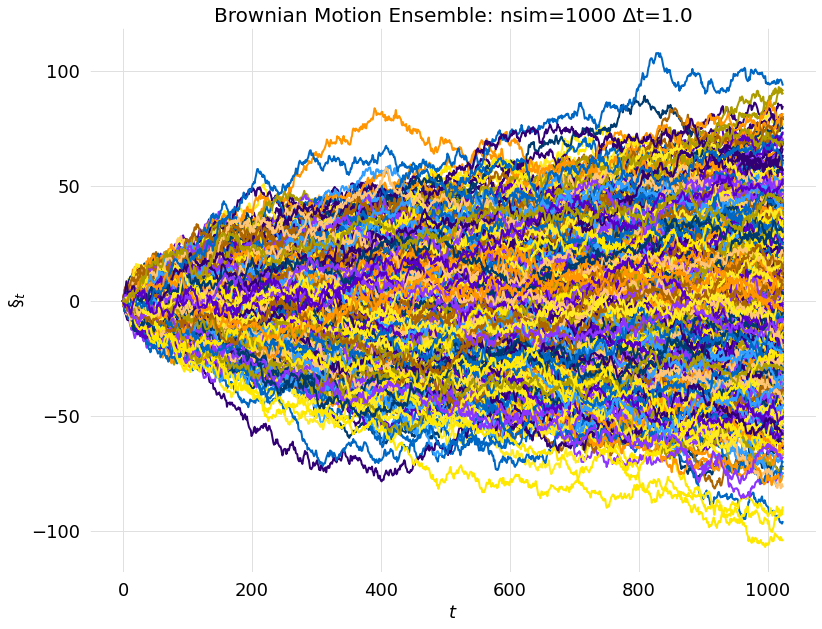

In [3]:
title = f"Brownian Motion Ensemble: nsim={nsim} Δt={Δt}"
bm = DataSource.create_ensemble(SourceType.BM, nsim, Δx=Δt, npts=npts)
comparison(bm, title=title, data_type=DataType.TIME_SERIES)

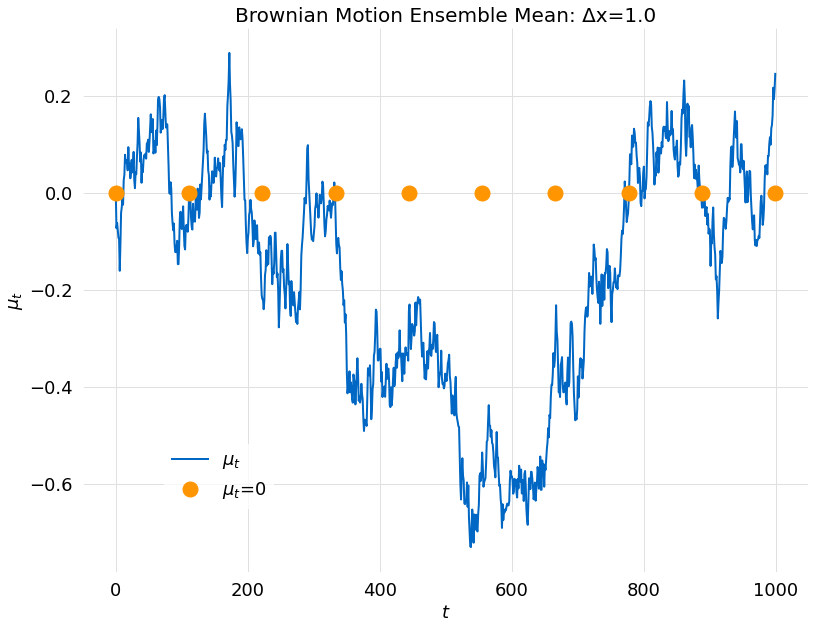

In [4]:
bm_mean = DataFunc.apply_func_type_to_ensemble(bm, DataType.MEAN)
bm_mean = DataFunc.apply_func_type(bm_mean, DataType.BM_MEAN)
fpoints(bm_mean, data_type=DataType.MEAN, func_type=DataType.BM_MEAN)

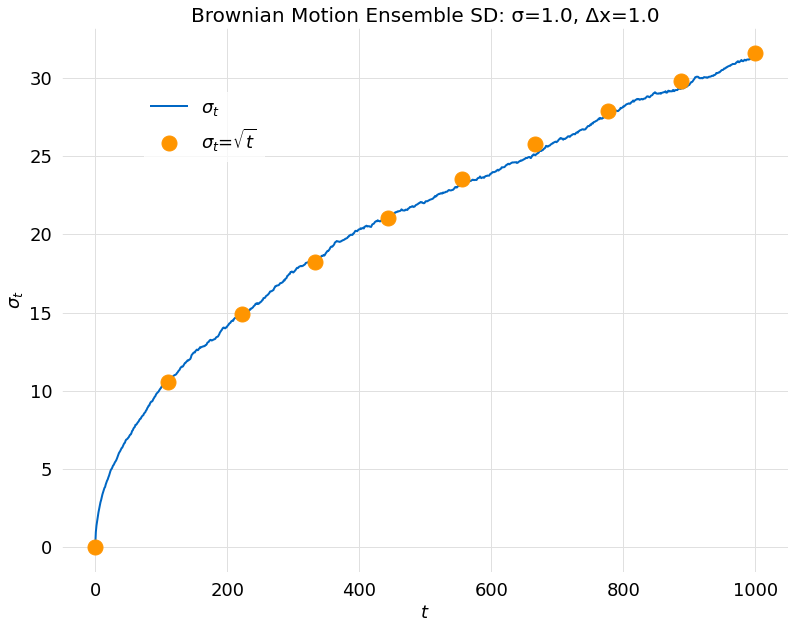

In [5]:
bm_sd = DataFunc.apply_func_type_to_ensemble(bm, DataType.SD)
bm_sd = DataFunc.apply_func_type(bm_sd, DataType.BM_SD)
fpoints(bm_sd, data_type=DataType.SD, func_type=DataType.BM_SD)

## Brownian Motion with Drift

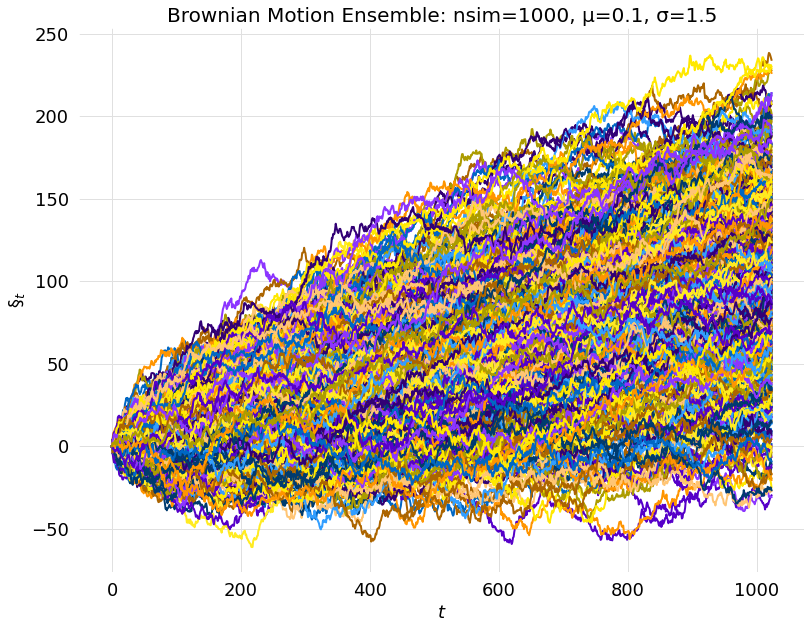

In [6]:
μ=0.1
σ=1.5
title = f"Brownian Motion Ensemble: nsim={nsim}, μ={μ}, σ={σ}"
bm_drift = DataSource.create_ensemble(SourceType.BM_DRIFT, nsim, Δx=Δt, npts=npts, μ=μ, σ=σ)
comparison(bm_drift, title=title, data_type=DataType.TIME_SERIES)

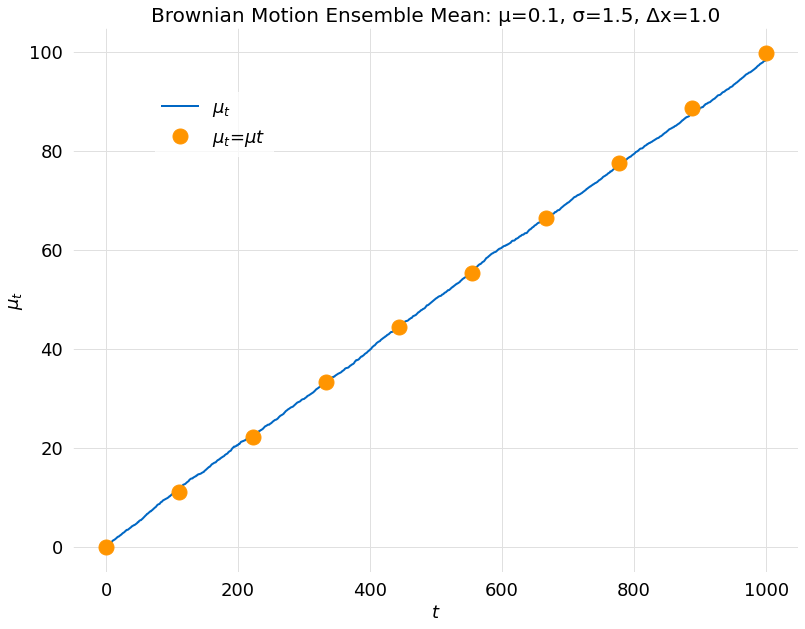

In [7]:
bm_drift_mean = DataFunc.apply_func_type_to_ensemble(bm_drift, DataType.MEAN)
bm_drift_mean = DataFunc.apply_func_type(bm_drift_mean, DataType.BM_DRIFT_MEAN, μ=μ, σ=σ)
fpoints(bm_drift_mean, data_type=DataType.MEAN, func_type=DataType.BM_DRIFT_MEAN)

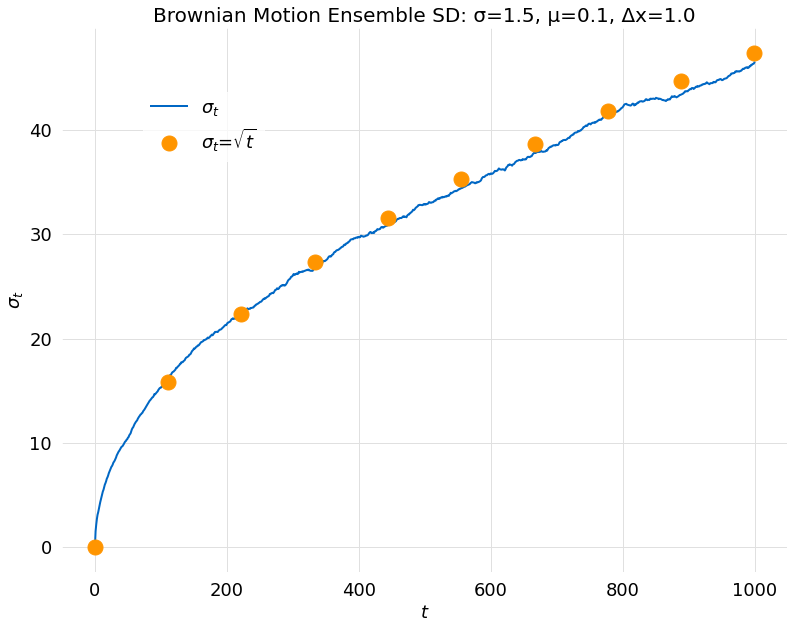

In [8]:
bm_drift_sd = DataFunc.apply_func_type_to_ensemble(bm_drift, DataType.SD)
bm_drift_sd = DataFunc.apply_func_type(bm_drift_sd, DataType.BM_SD, μ=μ, σ=σ)
fpoints(bm_drift_sd, data_type=DataType.SD, func_type=DataType.BM_SD)

## Geometric Brownian Motion

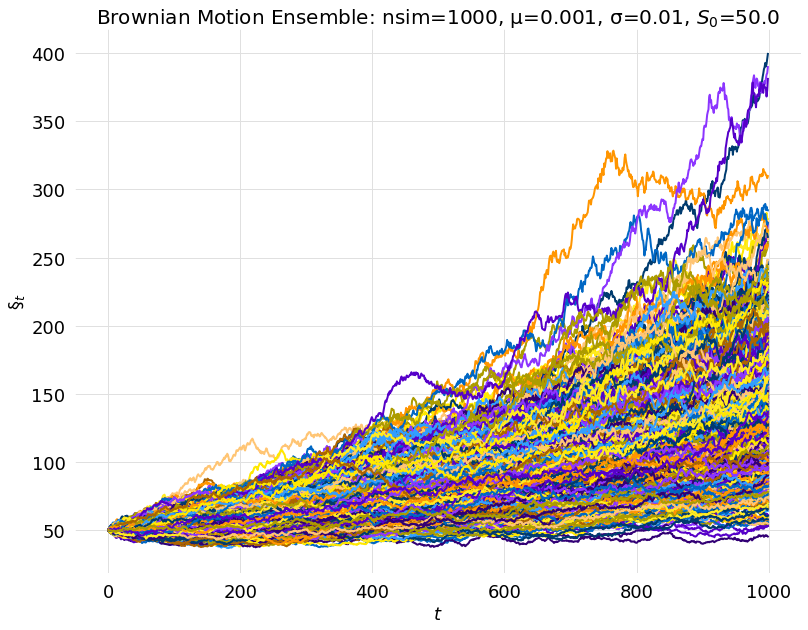

In [9]:
npts = 1000
nsim = 1000
μ=0.001
σ=0.01
S0 = 50.0
title = r'Brownian Motion Ensemble: nsim={nsim}, μ={μ}, σ={σ}, $S_0$={S0}'.format(nsim=nsim, μ=μ, σ=σ, S0=S0)
bm_geo = DataSource.create_ensemble(SourceType.BM_GEO, nsim, Δx=Δt, npts=npts, μ=μ, σ=σ, S0=S0)
comparison(bm_geo, title=title, data_type=DataType.TIME_SERIES)

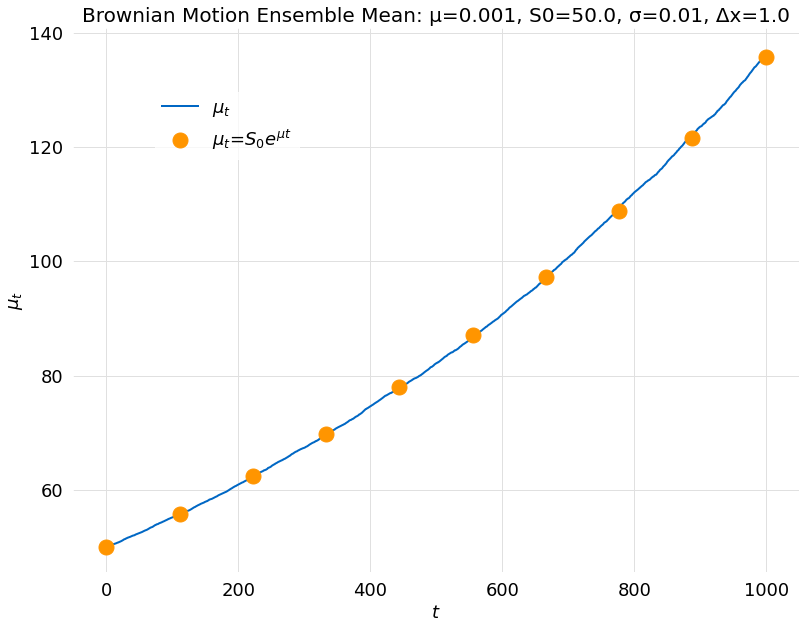

In [10]:
bm_geo_mean = DataFunc.apply_func_type_to_ensemble(bm_geo, DataType.MEAN)
bm_geo_mean = DataFunc.apply_func_type(bm_geo_mean, DataType.GBM_MEAN, μ=μ, σ=σ, S0=S0)
fpoints(bm_geo_mean, data_type=DataType.MEAN, func_type=DataType.GBM_MEAN)

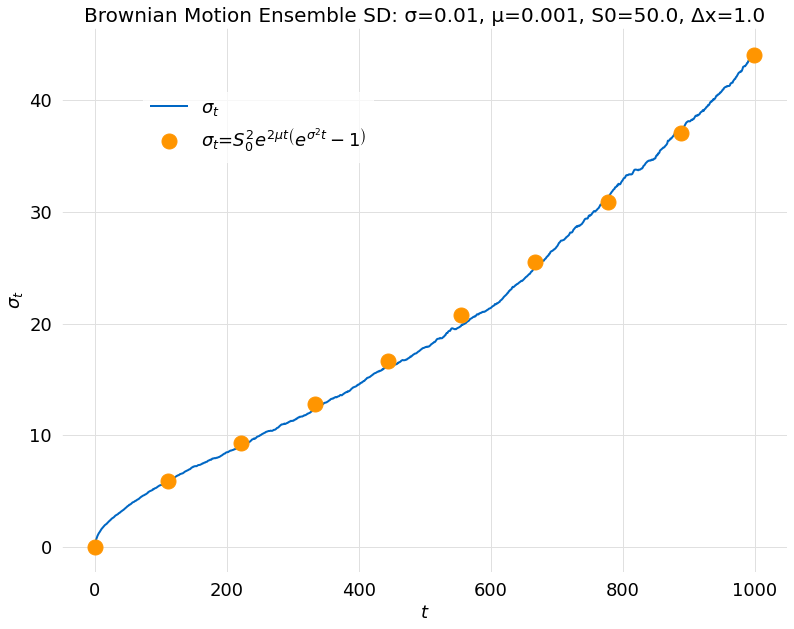

In [11]:
bm_geo_sd = DataFunc.apply_func_type_to_ensemble(bm_geo, DataType.SD)
bm_geo_sd = DataFunc.apply_func_type(bm_geo_sd, DataType.GBM_SD, μ=μ, σ=σ, S0=S0)
fpoints(bm_geo_sd, data_type=DataType.SD, func_type=DataType.GBM_SD)